# Introducción

Para el reto de averiguar los casos de dengue en el amazonas, el cuál ante todo nos hemos dado cuenta que es un problema de regresión, tenemos las siguientes variables : 

City: la ciudad donde se han registrado los casos de dengue en este caso San Juan y Iquitos.

Year: el año en el que se registraron los casos de dengue.

Weekofyear: la semana del año en la que se registraron los casos de dengue.

Week_start_date: la fecha de inicio de la semana en la que se registraron los casos de dengue.

Ndvi_ne: el índice de vegetación de diferencia normalizada para la región noreste.

Ndvi_nw: el índice de vegetación de diferencia normalizada para la región noroeste.

Ndvi_se: el índice de vegetación de diferencia normalizada para la región sureste.

Ndvi_sw: el índice de vegetación de diferencia normalizada para la región suroeste.

Precipitation_amt_mm: la cantidad de precipitación en milímetros.

Reanalysis_air_temp_k: la temperatura del aire según la reanálisis.

Reanalysis_avg_temp_k: la temperatura media según la reanálisis.

Reanalysis_dew_point_temp_k: la temperatura de punto de rocío según la reanálisis.

Reanalysis_max_air_temp_k: la temperatura máxima del aire según la reanálisis.

Reanalysis_min_air_temp_k: la temperatura mínima del aire según la reanálisis.

Reanalysis_precip_amt_kg_per_m2: la cantidad de precipitación en kilogramos por metro cuadrado según la reanálisis.

Reanalysis_relative_humidity_percent: la humedad relativa según la reanálisis.

Reanalysis_sat_precip_amt_mm: la cantidad de precipitación en milímetros según la reanálisis.

Reanalysis_specific_humidity_g_per_kg: la humedad específica según la reanálisis.

Reanalysis_tdtr_k: la amplitud diaria de la temperatura según la reanálisis.

Station_avg_temp_c: la temperatura promedio en grados Celsius según la estación meteorológica.

Station_diur_temp_rng_c: la variación diurna de la temperatura en grados Celsius según la estación meteorológica.

Station_max_temp_c: la temperatura máxima en grados Celsius según la estación meteorológica.

Station_min_temp_c: la temperatura mínima en grados Celsius según la estación meteorológica.

Station_precip_mm: la cantidad de precipitación en milímetros según la estación meteorológica.

# Lectura de ficheros train,test y label

In [1]:
# carga de datos
import io
from google.colab import files
import pandas as pd
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')),sep=",")
    return df

 # subimos el fichero
#asignamos el csv a la variable
x_train = pd.read_csv('/content/dengue_features_train.csv')

In [2]:
y_train = pd.read_csv('/content/dengue_labels_train.csv')

In [3]:
X_test =pd.read_csv('/content/dengue_features_test.csv')

# Obtención de csv completo y limpio

1. Rellenar valores nulos usando el siguiente método que se encarga de generar un valor nuevo a partir de la media de los últimos 20.

In [4]:
x_train = x_train.fillna(x_train.rolling(20, min_periods=1).mean())
X_test = X_test.fillna(X_test.rolling(20, min_periods=1).mean())

2. Cambiar datos de categóricos a numéricos y ver que casi todos los datos son de tipo float64 o int64.

In [5]:
x_train['city'].replace(['sj','iq'], [0,1], inplace = True)
X_test['city'].replace(['sj','iq'],[0,1],inplace=True)
x_train['week_start_date'] = x_train['week_start_date'].str.replace('-','')
x_train['week_start_date'] = pd.to_numeric(x_train['week_start_date'], errors='coerce')
X_test['week_start_date'] = X_test['week_start_date'].str.replace('-',' ')
X_test['week_start_date'] = pd.to_numeric(X_test['week_start_date'], errors='coerce')
x_train.dtypes

city                                       int64
year                                       int64
weekofyear                                 int64
week_start_date                            int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

3. Vemos la media, mediana, desviación estándar...

In [6]:
x_train.describe()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1456.000000,1.456000e+03,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.357143,2001.031593,26.503434,2.001097e+07,0.131501,0.129079,0.203536,0.202041,45.800004,298.705729,...,40.232494,82.168639,45.800004,16.751651,4.906868,27.193331,8.105896,32.460562,22.101740,39.492267
std,0.479322,5.408314,15.019437,5.405874e+04,0.135849,0.118839,0.073480,0.083543,43.547947,1.359680,...,43.313405,7.136534,43.547947,1.538794,3.547551,1.276082,2.130954,1.951960,1.570546,47.184923
min,0.000000,1990.000000,1.000000,1.990043e+07,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.000000,1997.000000,13.750000,1.997043e+07,0.037645,0.049170,0.155625,0.144639,9.960000,297.665000,...,13.200000,77.226429,9.960000,15.561429,2.328571,26.328571,6.528571,31.100000,21.100000,8.850000
50%,0.000000,2002.000000,26.500000,2.002053e+07,0.112100,0.117475,0.195664,0.187779,38.475000,298.650000,...,27.370000,80.301654,38.475000,17.105000,2.857143,27.414286,7.350000,32.800000,22.200000,24.350000
75%,1.000000,2005.000000,39.250000,2.005113e+07,0.230950,0.213689,0.248037,0.246914,70.092500,299.836617,...,52.525000,86.437500,70.092500,17.976071,7.646429,28.128571,9.681250,33.900000,23.300000,54.100000
max,1.000000,2010.000000,53.000000,2.010062e+07,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


4. Pequeña representación de como se queda x_train para después ver la correlación.

In [7]:
x_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,1990,18,19900430,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0,1990,19,19900507,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0,1990,20,19900514,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0,1990,21,19900521,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0,1990,22,19900528,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1,2010,21,20100528,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,1,2010,22,20100604,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,1,2010,23,20100611,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,1,2010,24,20100618,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


# Matriz de correlación

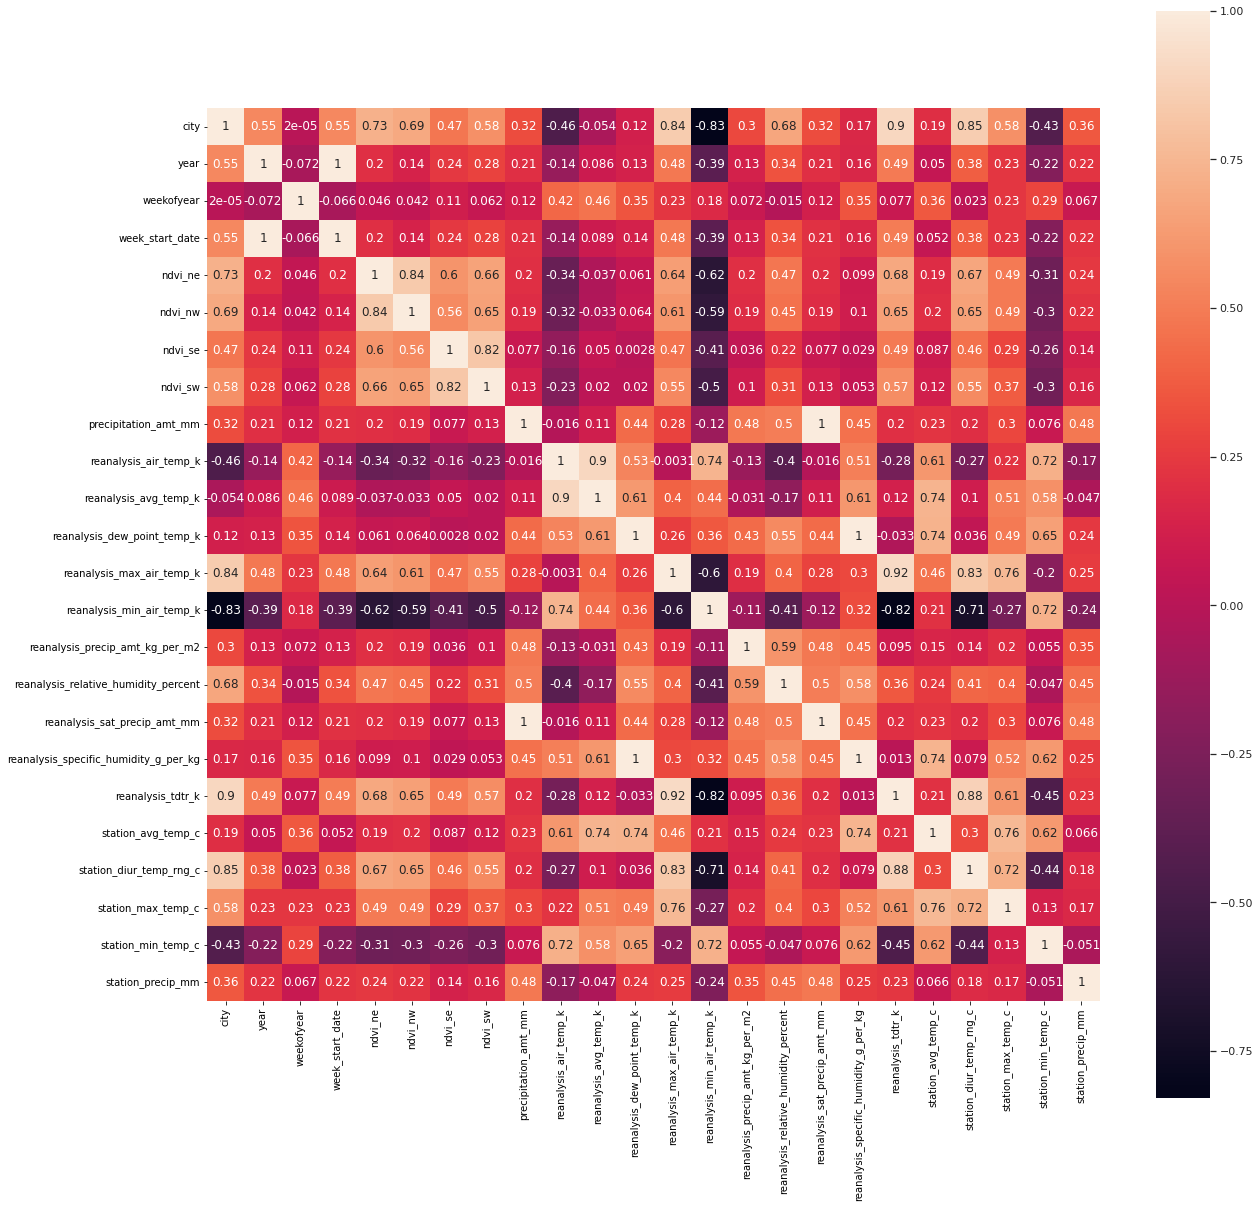

In [8]:
fig,ax = plt.subplots(figsize=(20,20))
sns.set()
sns.heatmap(x_train.corr(), square=True, annot=True)
plt.show()

Vemos claramente que hay relación entre muchas variables, aunque el día del comienzo de la semana es la que menos relación tiene con las demás, luego podemos eliminarla para obtener así un mejor entrenamiento y una mejor predicción.

# Borrado de datos


Debido a la conclusión anteriormente dicha, eliminaremos la columna **'week_start_date'** por la poca correlación que se puede observar en la matriz de correlación.

In [9]:
x_train = x_train.drop(['week_start_date'],axis=1)
X_test = X_test.drop(['week_start_date'],axis=1)
x_train

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,1,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,1,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,1,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


# Modelo



Actualmente para la separación de datos hacemos un proceso de simulación, es decir, trabajaremos con los datos de x_train y y_train (labels) para en este caso obtener todos los datos [Xtrain,Ytrain,Xtest,Ytest], puesto que no tenemos los datos de Ytest, ya que son los que vamos a predecir teniendo los datos anteriormente dichos y Xtest para hacer dicha predicción.Sin embargo, tenemos que usar Xtest e Ytest de la separación para obtener los vecinos más cercanos y entrenar el modelo.

In [10]:
from sklearn.model_selection import train_test_split
#pasamos datos de entrada y salida, además de eliminar la columna de nombres de coches del csv.

y= y_train['total_cases']

# separamos train y test 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_train, y, test_size=0.2, random_state=2)

Min Value uniform : 18.66381278538813 (6)
Min Value distance : 18.56793368825918 (6)


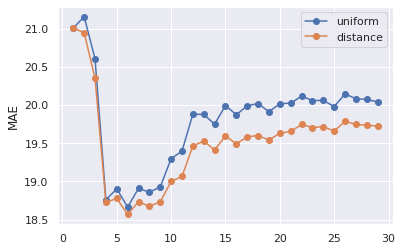

In [11]:
from sklearn import neighbors
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = TimeSeriesSplit(n_splits = 5) #
Xtrain.reset_index(drop = True, inplace = True) # reinicia índice, necesario tras borrar una columna

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(Xtrain):
          # División train test aleatoria
          f_train = Xtrain.loc[train_fold]
          f_test = Xtrain.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit(Xtrain,Ytrain)
          y_pred_cv = knn.predict(Xtest)
          # evaluación del modelo
          mae = mean_absolute_error(Ytest, y_pred_cv)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')     

plt.legend()
plt.show() 

In [12]:
# 1. elegir regresor
from sklearn.neighbors import KNeighborsRegressor # Se utiliza este método porque es un problema de clasificación
#Parámetros
k =6 # Kneighbours o vecinos
w = "distance" # elijo uniform porque al recorrer lo vecinos más cercano devuelve mayor precisión

# 2. instanciar el modelo
knn_model = KNeighborsRegressor(k, weights=w)
# 3. entrenamiento con los datos
knn_model.fit(Xtrain , Ytrain)
# 4. crear solo predicción
y_pred = knn_model.predict(X_test)

In [13]:
y_pred.astype('int')

array([ 9,  6,  8,  7, 30, 41,  3, 11,  9, 26, 23, 12, 12, 35, 41, 15, 34,
       15, 42, 76, 29, 17, 11, 23, 35, 27, 13, 29, 35, 25, 19, 15, 14, 26,
       15, 34, 13, 10, 14, 14,  6, 12,  8,  7, 20, 16,  8,  8,  4,  5,  6,
        5, 11,  8, 13, 23, 19,  4, 17,  3,  5, 40, 33, 11,  9, 28, 22,  8,
       25, 28, 35, 45,  5, 20, 27, 52, 21, 14, 39, 18, 11, 32, 35, 18, 16,
       18, 13, 38, 11, 24, 13,  9,  8, 10, 12,  8, 12, 12, 10, 11,  7, 12,
        4, 10, 16,  9, 12, 31, 27, 28, 22, 23, 49, 28, 30, 80,  9, 38, 26,
       27, 38, 61, 37, 27, 33, 47, 25, 40, 16, 23, 12, 29, 39, 34, 23, 17,
       13, 28, 19, 26, 14, 16,  7, 13, 12,  8,  7, 14, 11, 11,  8,  5, 12,
        6,  8, 10,  6,  9, 12,  1,  1, 21, 40,  5, 10, 14, 44, 42,  2, 11,
       15, 47, 37, 41,  3, 51, 14, 57, 14, 28,  8, 70, 77, 38, 43, 22, 43,
       81, 19, 21, 18, 30, 12,  7, 13, 11, 14, 13,  8, 11, 11, 12,  4,  6,
       15, 18,  7, 15,  6,  8, 11, 20, 16,  7, 12, 12, 10, 11, 14, 12, 49,
       18, 39, 16, 21, 46

# Carga del fichero, reemplazo de valores de la columna de casos y descarga del mismo

1. Cargamos el csv que nos han proporcionado, luego reemplazamos los valores por la predicción obtenida.

In [14]:
results = pd.read_csv('submission_format.csv')
results['total_cases'] = y_pred.astype('int')
results

,city,year,weekofyear,total_cases
0,sj,2008,18,9
1,sj,2008,19,6
2,sj,2008,20,8
3,sj,2008,21,7
4,sj,2008,22,30
...,...,...,...,...
411,iq,2013,22,20
412,iq,2013,23,1
413,iq,2013,24,4
414,iq,2013,25,4


2. Descargamos el csv.

In [15]:
results.to_csv("results_cases_dengue.csv", index=False) 